<a href="https://colab.research.google.com/github/mlacasa/Regression/blob/main/CatBosstBostonDatasetExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
!pip install shap

In [10]:
# Cargamos librerías y la dataset

import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
from matplotlib import pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
boston=load_boston()
boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [11]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5) # Separamos train y test

In [12]:
# Preparamos la dataset para catboost para optimizar

train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [14]:
# Creamos el modelo
model = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
# Tuneamos el modelo
# https://catboost.ai/docs/concepts/parameter-tuning.html

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

In [17]:
# Comparamos r2 train y test para evaluar overfitting, que lo hay.
# Pero debemos considerar nulo trabajo de análisis y feature engineering

pred = model.predict(X_test)
pred_train = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2_test = r2_score(y_test, pred)
r2_train = r2_score(y_train, pred_train)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2_test: {:.2f}'.format(r2_test))
print('R2_train: {:.2f}'.format(r2_train))

Testing performance
RMSE: 2.83
R2_test: 0.90
R2_train: 0.98


Text(0.5, 0, 'CatBoost Feature Importance')

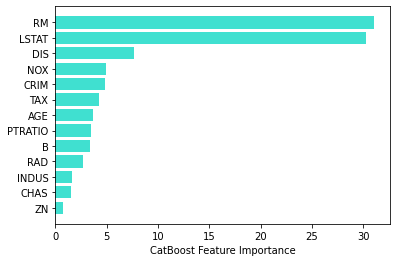

In [22]:
# Dibujamos
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(boston.columns[sorted_feature_importance], model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")


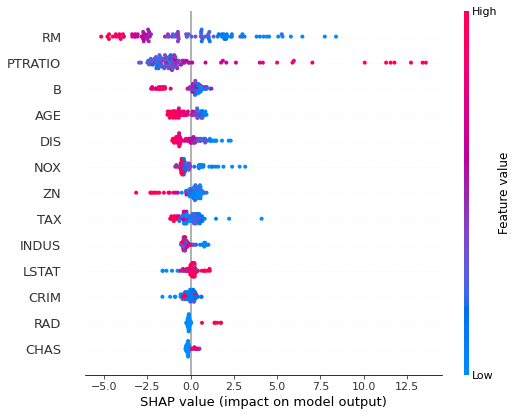

In [25]:
# Más info https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Catboost%20tutorial.html

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = boston.columns[sorted_feature_importance])

In [33]:
# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X[0,:])

In [39]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X, feature_names = boston.columns)